I will be using the credit card data to cluster the customers into groups: either approved for credit card or not approved (when using two clusters) or various levels of risk groups (using more than two clusters).

In [2]:
import matplotlib.pyplot as plt          #importing some packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans


As with all methods of data analysis, I will begin by getting a better feel for the data through exploration.

In [3]:
cc = pd.read_csv('Datasets/CC_General.csv', index_col=0)
print(cc.head())

             BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10004   1666.670542           0.636364    1499.00           1499.00   
C10005    817.714335           1.000000      16.00             16.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                     95.4      0.000000             0.166667   
C10002                      0.0   6442.945483             0.000000   
C10003                      0.0      0.000000             1.000000   
C10004                      0.0    205.788017             0.083333   
C10005                      0.0      0.000000             0.083333   

    

In [4]:
print(cc.describe())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

In [5]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8637 non-null float64
PRC_FULL_PAYMENT         

Every column has 8950 non-null entries, except for CREDIT_LIMIT and MINIMUM_PAYMENTS. First I will eliminate the row with the NaN entry in the CREDIT_LIMIT column, as I wish to use this column soon. Then I will deal with the MINIMUM_PAYMENTS null entries as I add more features to the model, either by eliminating the column overall or by imputing the missing values.

In [6]:
print(cc.sort_values('CREDIT_LIMIT')) #NaN entry found as last entry in sorted DF. C15349. Now to eliminate that row.
cc.drop('C15349', inplace=True)
cc.info()

              BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                 
C17140     795.497557           0.909091       0.00              0.00   
C15662      70.794108           0.909091       0.00              0.00   
C16725     151.704474           1.000000       0.00              0.00   
C16744      45.226140           0.727273       0.00              0.00   
C13566     348.813275           1.000000       0.00              0.00   
C12567     112.010460           1.000000     229.00            229.00   
C13341      42.996921           1.000000     230.04            230.04   
C12018     107.130020           1.000000      15.40             15.40   
C13879      72.723403           0.909091       0.00              0.00   
C17193      45.663290           0.454545      77.00             77.00   
C12116       8.258214           0.545455      92.46              0.00   
C18492     223.820349           0.800000    1176.72

After looking at the data, I will choose two features to be plotted in a scatter plot on which we can display the clusters. Two important features will be credit limit and balance so I will be using those two.

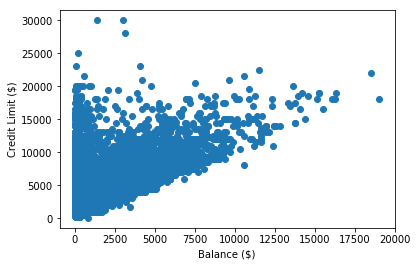

In [7]:
plt.scatter(cc['BALANCE'], cc['CREDIT_LIMIT'])
plt.ylabel('Credit Limit ($)')
plt.xlabel('Credit Card Balance ($)')
plt.show()

First I will be clustering using K-means and just these two features. I will evaluate what number of clusters to use based on a plot of the inertias of each model, varying the number of clusters. Then I will do the same with all features and see how the clustering differs. Because the two features I have chosen have similar ranges, I will not be scaling the data before clustering.

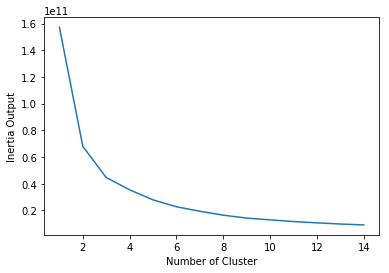

In [8]:
balance_limit = cc.loc[:,['BALANCE','CREDIT_LIMIT']]
inertias = []
for i in range(1,15):
    model = KMeans(n_clusters = i)
    model.fit(balance_limit)
    inertias.append(model.inertia_)

plt.plot(range(1,15), inertias)
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia Output')
plt.show() 

A good rule of thumb for choosing the number of clusters to use is to pick the 'elbow' on the inertia plot. In this case it seems both two and three would be good choices of number of clusters to use.

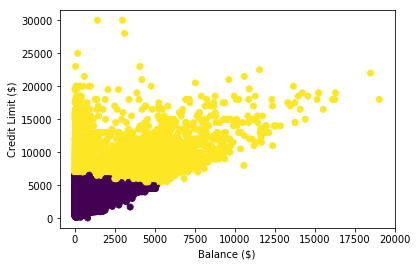

In [9]:
model = KMeans(n_clusters = 2)
model.fit(balance_limit)
labels = model.predict(balance_limit)
plt.scatter(cc['BALANCE'], cc['CREDIT_LIMIT'], c = labels)
plt.ylabel('Credit Limit ($)')
plt.xlabel('Credit Card Balance ($)')
plt.show()

So with two clusters, we end up with two groups: high-risk and low risk. It seems the greater determining factor between these two features is the credit limit. A stark, almost horizontal boundary divides the two clusters. I will now see if three clusters follows a similar pattern of valuing credit limit over credit card balance.

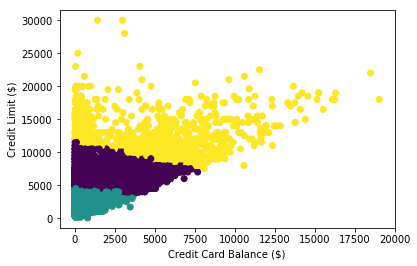

In [10]:
model = KMeans(n_clusters = 3)
model.fit(balance_limit)
labels = model.predict(balance_limit)
plt.scatter(cc['BALANCE'], cc['CREDIT_LIMIT'], c = labels)
plt.ylabel('Credit Limit ($)')
plt.xlabel('Credit Card Balance ($)')
plt.show()

As predicted, once again the credit limit is a much greater predictor of which group each point belongs to than the credit card balance. I will now recreate the model using all the features. Then I will visualize the clusters once more against these two features to see how the clusters have changed. First I will test various numbers of clusters and look to the inertia plot to determine how many clusters to use, as before. Also, I will scale the data in this exercise so as not to have the model emphasize one feature over another due to higher variance. Finally, I will first need to impute or purge the MINIMUM_PAYMENTS column which has approximately 300 null values.

In [19]:
cc['LIM_MIN_RATIO'] = cc['CREDIT_LIMIT']/cc['MINIMUM_PAYMENTS']
print(cc.sort_values('PRC_FULL_PAYMENT').head(n=300))

              BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                 
C10001      40.900749           0.818182      95.40              0.00   
C15445    6069.720873           1.000000       0.00              0.00   
C15444    4476.634442           1.000000       0.00              0.00   
C15442    1182.280750           1.000000       0.00              0.00   
C15441       2.585715           0.090909      70.00             70.00   
C15439    1102.632150           1.000000    1409.31           1080.18   
C15438    1903.274531           0.545455    1813.40              0.00   
C15437      15.449607           0.818182     574.75              0.00   
C15436    7268.706380           1.000000     306.91            306.91   
C15433    1595.980444           1.000000       0.00              0.00   
C15432    1143.333419           1.000000       0.00              0.00   
C15430    5238.915225           1.000000     270.00

Since the entries with NaN in the MINIMUM_PAYMENTS column coincide with lower values in the CREDIT_LIMIT column, I will not delete the entire row, as I would not want to eliminate data that represents one specific group within the overall data. Instead I will create a new column that is the ratio of minimum payments to credit limit. Then I will take the median of that column and impute the NaN values of the new LIM_MIN_RATIO column with that value. From there, I will impute the NaN values of the MINIMUM_PAYMENTS column by dividing the CREDIT_LIMIT column by the LIM_MIN_RATIO column. 

In [23]:
cc.describe() #Median value of LIM_MIN_RATIO is 8.477591
cc.fillna(value = {'LIM_MIN_RATIO':8.477591}, inplace = True)
cc['MINIMUM_PAYMENTS'] = cc.apply(
    lambda row: row['CREDIT_LIMIT']/row['LIM_MIN_RATIO'] if np.isnan(row['MINIMUM_PAYMENTS']) else row['MINIMUM_PAYMENTS'],
    axis=1)

In [24]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, C10001 to C19190
Data columns (total 18 columns):
BALANCE                             8949 non-null float64
BALANCE_FREQUENCY                   8949 non-null float64
PURCHASES                           8949 non-null float64
ONEOFF_PURCHASES                    8949 non-null float64
INSTALLMENTS_PURCHASES              8949 non-null float64
CASH_ADVANCE                        8949 non-null float64
PURCHASES_FREQUENCY                 8949 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8949 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8949 non-null float64
CASH_ADVANCE_FREQUENCY              8949 non-null float64
CASH_ADVANCE_TRX                    8949 non-null int64
PURCHASES_TRX                       8949 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8949 non-null float64
MINIMUM_PAYMENTS                    8949 non-null float64
PRC_FULL_PAYMENT         

Now with all the columns with the same amount of non-null entries, I will begin the scaling and create the inertia plot to determine how many clusters to use. 

C:\Users\Melissa\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Melissa\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


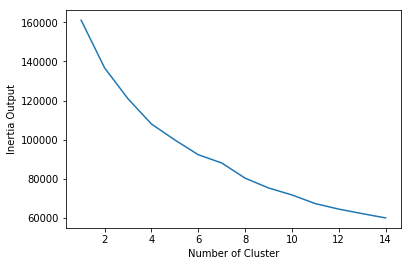

In [27]:
from sklearn.preprocessing import StandardScaler

new_inertias=[]
scaler = StandardScaler()
scaler.fit(cc)
cc_scaled = scaler.transform(cc)
for i in range(1,15):
    model = KMeans(n_clusters = i)
    model.fit(cc_scaled)
    new_inertias.append(model.inertia_)
plt.plot(range(1,15), new_inertias)
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia Output')
plt.show() 

This... looks like one giant elbow. Although, it does look like there are bigger changes in slope at 2 and 4. I will now create models with clustering of 2, 3, 4 and plot them on the same scatter plot used previously to see how the clustering differs from my earlier models.

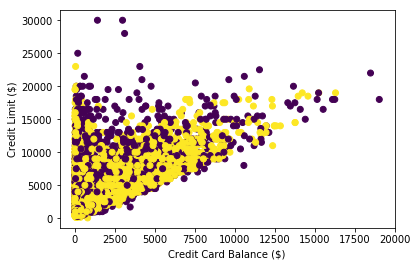

In [28]:
model = KMeans(n_clusters = 2)
model.fit(cc_scaled)
labels = model.predict(cc_scaled)
plt.scatter(cc['BALANCE'], cc['CREDIT_LIMIT'], c = labels)
plt.ylabel('Credit Limit ($)')
plt.xlabel('Credit Card Balance ($)')
plt.show()

Comparing this clustering with two clusters to the earlier two-cluster model shows significant differences. I will need to plot the clusters against various features to better represent the different groups. 

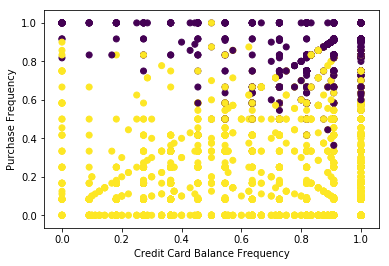

In [29]:
plt.scatter(cc['BALANCE_FREQUENCY'], cc['PURCHASES_FREQUENCY'], c = labels)
plt.ylabel('Purchase Frequency')
plt.xlabel('Credit Card Balance Frequency')
plt.show()

The groupings are certainly more clearly delineated within the plot of these two features. The yellow represents lower risk applicants while the purple is higher risk. This plot shows that higher balance frequency and high purchase frequency represent higher-risk applicants, as one would logically expect. I will check additional feature plots to see what other features correlate with the high- and low-risk applicants.

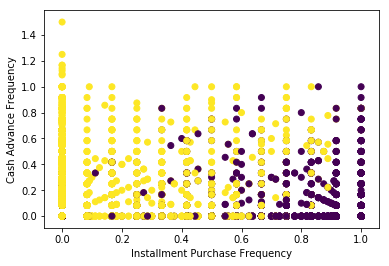

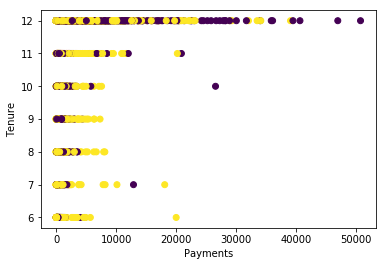

In [31]:
plt.scatter(cc['PURCHASES_INSTALLMENTS_FREQUENCY'], cc['CASH_ADVANCE_FREQUENCY'], c = labels)
plt.ylabel('Cash Advance Frequency')
plt.xlabel('Installment Purchase Frequency')
plt.show()

plt.scatter(cc['PAYMENTS'], cc['TENURE'], c = labels)
plt.ylabel('Tenure')
plt.xlabel('Payments')
plt.show()

From the first plot, it seems that cash advance frequency has little correlation with the high- and low- risk groupings. However, installment purchase frequency coincides with higher risk.

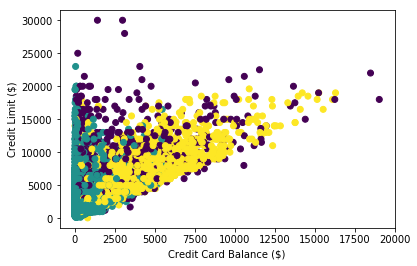

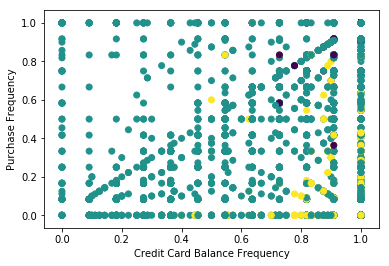

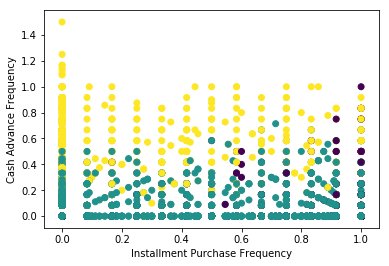

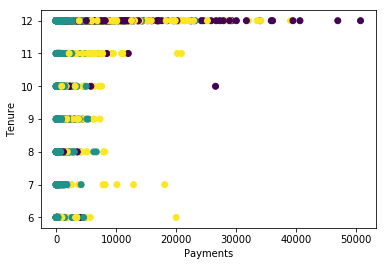

In [32]:
model = KMeans(n_clusters = 3)
model.fit(cc_scaled)
labels = model.predict(cc_scaled)

plt.scatter(cc['BALANCE'], cc['CREDIT_LIMIT'], c = labels)
plt.ylabel('Credit Limit ($)')
plt.xlabel('Credit Card Balance ($)')
plt.show()

plt.scatter(cc['BALANCE_FREQUENCY'], cc['PURCHASES_FREQUENCY'], c = labels)
plt.ylabel('Purchase Frequency')
plt.xlabel('Credit Card Balance Frequency')
plt.show()

plt.scatter(cc['PURCHASES_INSTALLMENTS_FREQUENCY'], cc['CASH_ADVANCE_FREQUENCY'], c = labels)
plt.ylabel('Cash Advance Frequency')
plt.xlabel('Installment Purchase Frequency')
plt.show()

plt.scatter(cc['PAYMENTS'], cc['TENURE'], c = labels)
plt.ylabel('Tenure')
plt.xlabel('Payments')
plt.show()

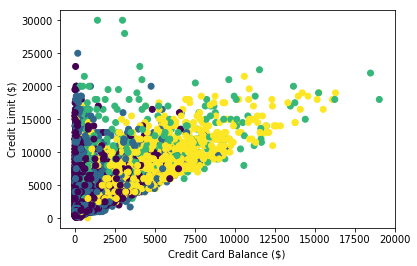

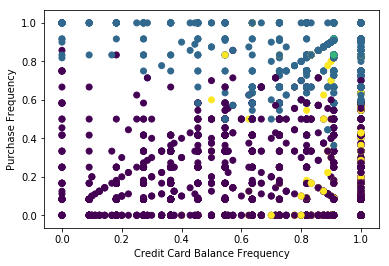

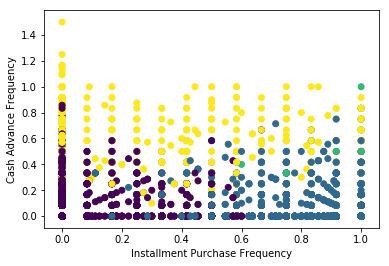

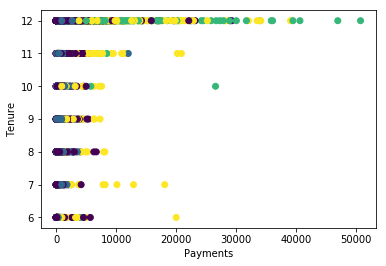

In [33]:
model = KMeans(n_clusters = 4)
model.fit(cc_scaled)
labels = model.predict(cc_scaled)

plt.scatter(cc['BALANCE'], cc['CREDIT_LIMIT'], c = labels)
plt.ylabel('Credit Limit ($)')
plt.xlabel('Credit Card Balance ($)')
plt.show()

plt.scatter(cc['BALANCE_FREQUENCY'], cc['PURCHASES_FREQUENCY'], c = labels)
plt.ylabel('Purchase Frequency')
plt.xlabel('Credit Card Balance Frequency')
plt.show()

plt.scatter(cc['PURCHASES_INSTALLMENTS_FREQUENCY'], cc['CASH_ADVANCE_FREQUENCY'], c = labels)
plt.ylabel('Cash Advance Frequency')
plt.xlabel('Installment Purchase Frequency')
plt.show()

plt.scatter(cc['PAYMENTS'], cc['TENURE'], c = labels)
plt.ylabel('Tenure')
plt.xlabel('Payments')
plt.show()

I find it much easier in these cases to make sense of the two-cluster plots than the 3- and 4-cluster. 